https://github.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection
### deskripsi data : 
dari dataset ini merupakan dataset tentang hate speech dari media sosial Twitter yang dimana terdapat jenis-jenis hate speech:

### problem
1. tujuan dari model yang akan dibuat dapat mengklasifikasi sebuat tweet merupakan sebuah kalimat hate speech atau tida.
2. ingin meminimalisir FN, sehingga menggunakan recall




In [ ]:
pip install symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 4.9 MB/s 
     |████████████████████████████████| 125 kB 62.3 MB/s 


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.6 MB/s 


In [ ]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.6 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3167689 sha256=e32dce67f594c28efd456f2d5ba043d767cb5a1498d601712759d652454de9bb
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import re 
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # lemmatization
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory 

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize #tokenization word
from nltk.probability import FreqDist # requesncy word
from nltk.corpus import stopwords # filtering
from symspellpy import SymSpell

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter
import gzip
from urllib.request import urlopen

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential




import tensorflow_hub as hub

pd.get_option("display.max_columns")

20

In [ ]:
#pip install nltk
#!pip install Sastrawi
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
id_stopword_dict = pd.read_csv('pre/id_stopword_dict.csv')
id_stopword_dict.drop(['Unnamed: 0'], axis=1)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [ ]:
df_alay = pd.read_csv('pre/new_kamusalay.csv', encoding="latin-1")

df = pd.read_csv("pre/data.csv", encoding='latin-1')
df.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['HS'], test_size=0.1)

In [ ]:
print(f'train : {X_train.shape}')
print(f'test : {X_test.shape}')

train : (11852,)
test : (1317,)


In [ ]:
#train
X_train = pd.DataFrame(X_train).reset_index()
y_train = pd.DataFrame(y_train).reset_index()

In [ ]:
#test
X_test = pd.DataFrame(X_test).reset_index()
y_test = pd.DataFrame(y_test).reset_index()

In [ ]:
# menyatukan train
df_train = pd.merge(X_train, y_train, on='index', how='right')

In [ ]:
# menyatukan test
df_test = pd.merge(X_test, y_test, on='index', how='right')

In [ ]:
df_test

,index,Tweet,HS
0,2818,Wusu gua bom ya lu. Mentab gua rame ama dia do...,0
1,9552,Daripada bacot ini itu dan menyakiti orang lai...,0
2,12516,"RT USER: Mantap bgt bro, \nUdah ganteng, pake ...",0
3,12394,SOLUSINYA ada Dua pilihan; ; Artinya Harus Mel...,0
4,8209,"""BR1M ini amat penting dari segi sistem pulang...",0
...,...,...,...
1312,2361,#MataNajwaDebatJakarta lucu banget jawaban aho...,1
1313,5471,USER USER InsyaAllah. Mudah2an yg jadi Preside...,0
1314,5450,Allahu Akbar !!! Ane benar bangga dan terharu....,0
1315,6278,USER Tetep aja JKT58 dan kecoak\xc2\xb2 212 te...,1


In [ ]:
df_train.head()

,index,Tweet,HS
0,9698,USER iya anjir dah bolot budeg lagi',1
1,3266,USER USER USER Sok kenal lu kunyuk',1
2,4903,hyunjin sinting emang ganteng bener',0
3,9809,"Usir saja Dubes Myanmar,,, Kumpulkan orang bud...",1
4,1158,USER USER USER USER USER USER USER USER USER U...,1


In [ ]:
%matplotlib inline
fig = px.pie(names = ['HS', 'no_HS'],
             values = [df['HS'].value_counts()[1], df['HS'].value_counts()[0]],
             title = 'persentase label',
             color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
%matplotlib inline
# jumlah stiap jenis hate speech
Abusife = len(df[df['Abusive']==1])
HS_Ind = len(df[df['HS_Individual']==1])
HS_Group = len(df[df['HS_Group']==1])
HS_Religion = len(df[df['HS_Religion']==1])
HS_Race = len(df[df['HS_Race']==1])
HS_physical = len(df[df['HS_Physical']==1])
HS_Gender = len(df[df['HS_Gender']==1])
HS_Other = len(df[df['HS_Other']==1])
HS_Weak = len(df[df['HS_Weak']==1])
HS_Moderate = len(df[df['HS_Moderate']==1])
HS_Strong = len(df[df['HS_Strong']==1])

jenis = ['Abusive', 'HS_Ind', 'HS_Religion', 'HS_Race', 'HS_physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
count = [Abusife, HS_Group, HS_Religion, HS_Race, HS_physical, HS_Gender, HS_Other, HS_Weak, HS_Moderate, HS_Strong]

fig = px.pie(names = jenis,
             values = count, 
             title = 'jumlah seluruh jenis hate speech',
             color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
stopword = ['ada','adalah','adanya','adapun','agak']
dict = {'stopword':stopword}
dic = pd.DataFrame(dict)

dic.to_csv('pre/id_stopword_dict.csv')

In [ ]:
df_alay.rename(columns={'anakjakartaasikasik':'original', 'anak jakarta asyik asyik' : 'replace'}, inplace=True)
df_alay.head()

,original,replace
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict = dict(zip(df_alay['original'], df_alay['replace']))
def normalize_alay(text):
  return ' '.join(alay_dict[word] if word in alay_dict else word for word in text.split(' '))



def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [ ]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [ ]:
df['text'] = df['Tweet'].apply(preprocess)
df[['text']].head(10)

,text
0,di saat semua cowok usaha lacak perhati gue ka...
1,siapa yang telat beri tau kamu edan sarap gue ...
2,41 kadang aku pikir kenapa aku tetap percaya p...
3,aku itu aku dan ku tau mata sipit tapi lihat d...
4,kaum cebong kafir sudah lihat dongok dari awal...
5,ya bani taplak dan kawan kawan xf0 x9f x98 x84...
6,deklarasi pilih kepala daerah 2018 aman dan an...
7,gue baru saja selesai re watch aldnoah zero pa...
8,nah admin belanja satu lagi po baik nak makan ...
9,enak lagi kalau sambil ngewe


In [ ]:
df.to_csv('pre/cleaned2.csv')

In [ ]:
# filtering 
def lower(text):
  return text.lower()


def case_folding(text):
  #text  = re.sub('[^\x00-\x7f]','',text)
  text = re.sub(r"http\S+",' ',text)
  text  = re.sub(r"\\n",' ', text.strip())
  text = (re.sub(r"\\x[A-Za-z0-9./]+", r' ', text))
  text = re.sub(r'rt', ' ', text)
  text = re.sub(r'user', ' ', text)
  text = re.sub("#.+\S",' ',text)
  text = re.sub(r"\b(?=[wk]*w)w*k[wk]*\b | wkwk", ' ', text)
  text = re.sub(r"wkwk", '', text)
  text = re.sub(r"\b(?=[ha]*h)h*a[ha]*\b | haha", ' ', text)
  text = re.sub(r'\d', ' ',text)
  return text


def punctuation(text):
  text = text.translate(str.maketrans(" "," ", string.punctuation))
  return text


alay_dict = dict(zip(df_alay['original'], df_alay['replace']))
def replace(text):
  return ' '.join(alay_dict[word] if word in alay_dict else word for word in text.split(' '))


def strip(text):
  text = text.strip()
  return text


def preprocess_filter(text):
  text = lower(text)
  text = case_folding(text)
  text = punctuation(text)
  text = replace(text)
  text = strip(text)
  #text = emoticon(text)
  return text


In [ ]:
df_train['text'] = df_train['Tweet'].apply(preprocess_filter)
df_train[['text']].head(10)

,text
0,iya anjir sudah bolot budek lagi
1,sok kenal kamu kunyuk
2,hyunjin sinting memang ganteng benar
3,usir saja duta besar myanmar kumpulkan orang b...
4,yang tidak pakai jilbab komunis megawati sri m...
5,dan anehnya juga orang yang tidak suka gue suk...
6,he pria janganlah jadi bencong ideologi kiara...
7,sejak tahun an lagi majlis fatwa kebangsaan ...
8,masyaallah indahnya melihat kedua tokoh terseb...
9,itu doa bro kan semua akan tua pada waktunya d...


In [ ]:
df_train.isnull().sum()

index    0
Tweet    0
HS       0
text     0
dtype: int64

In [ ]:
# tokenizer word
def tokenize_word(text):
  text = word_tokenize(text)
  return text

df_train['token_word'] = df_train['text'].apply(tokenize_word)

In [ ]:
# jumlah kata dalam kalimat kalimat
list_count = []
for i in df_train['token_word']:
    list_count.append(len(i))

In [ ]:
df_count = pd.DataFrame(list_count, columns=['count_word']).reset_index()
df_count.head()

,index,count_word
0,0,6
1,1,4
2,2,5
3,3,20
4,4,19


In [ ]:
df_train.columns

Index(['index', 'Tweet', 'HS', 'text', 'token_word'], dtype='object')

In [ ]:
df_train = df_train.reset_index()
df_train.drop(columns=['index'], axis=1,inplace=True)
df_train.rename(columns={'level_0' : 'index'}, inplace=True)

In [ ]:
df_train = pd.merge(df_train, df_count, on='index', how='right')

In [ ]:
df_hs = df_train[['text', 'token_word', 'count_word','HS']].copy()

df_hs.head()

,text,token_word,count_word,HS
0,iya anjir sudah bolot budek lagi,"[iya, anjir, sudah, bolot, budek, lagi]",6,1
1,sok kenal kamu kunyuk,"[sok, kenal, kamu, kunyuk]",4,1
2,hyunjin sinting memang ganteng benar,"[hyunjin, sinting, memang, ganteng, benar]",5,0
3,usir saja duta besar myanmar kumpulkan orang b...,"[usir, saja, duta, besar, myanmar, kumpulkan, ...",20,1
4,yang tidak pakai jilbab komunis megawati sri m...,"[yang, tidak, pakai, jilbab, komunis, megawati...",19,1


In [ ]:
count_perword = pd.DataFrame(df_hs['count_word'].value_counts()).reset_index()
count_perword.rename(columns={'index':'jum_kata', 'count_word':'quantity'}, inplace=True)
count_perword.head()

,jum_kata,quantity
0,10,531
1,6,526
2,9,519
3,8,505
4,11,494


In [ ]:
%matplotlib inline
fig = px.bar(count_perword.head(),
             x='jum_kata',
             y='quantity',
             color='quantity',
             title='quantity jumlah perkata dalam kalimat')

fig.show()

jumlah kata paling banyak yaitu dengan jumlah 9 dengan quantity 585

In [ ]:
df_hs

,text,token_word,count_word,HS
0,iya anjir sudah bolot budek lagi,"[iya, anjir, sudah, bolot, budek, lagi]",6,1
1,sok kenal kamu kunyuk,"[sok, kenal, kamu, kunyuk]",4,1
2,hyunjin sinting memang ganteng benar,"[hyunjin, sinting, memang, ganteng, benar]",5,0
3,usir saja duta besar myanmar kumpulkan orang b...,"[usir, saja, duta, besar, myanmar, kumpulkan, ...",20,1
4,yang tidak pakai jilbab komunis megawati sri m...,"[yang, tidak, pakai, jilbab, komunis, megawati...",19,1
...,...,...,...,...
11847,astagfirullah aku bacanya kembang kontol,"[astagfirullah, aku, bacanya, kembang, kontol]",5,0
11848,atasan nya plonga plongo ya bawahan nya pada d...,"[atasan, nya, plonga, plongo, ya, bawahan, nya...",12,1
11849,dasar cebong ih,"[dasar, cebong, ih]",3,0
11850,sudah azan subuh nih salat yuk yang kristen s...,"[sudah, azan, subuh, nih, salat, yuk, yang, kr...",10,0


In [ ]:
list_word=[]
for i in df_hs['token_word']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
fdict.most_common(10)

[('yang', 4372),
 ('tidak', 2790),
 ('dan', 2744),
 ('di', 2742),
 ('itu', 1854),
 ('kamu', 1585),
 ('ini', 1410),
 ('indonesia', 1293),
 ('ada', 1292),
 ('kalau', 1189)]

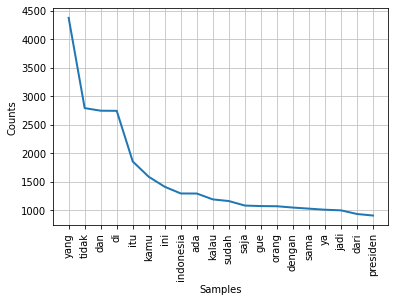

In [ ]:
fdict.plot(20)
plt.show()

In [ ]:
# lemmatization
fectory_stemmer = StemmerFactory()
stemmer_fec = fectory_stemmer.create_stemmer()

def lemma(text):
  text = stemmer_fec.stem(text)
  return text

df_hs['text_lemma'] = df_hs['text'].apply(lemma)

In [ ]:
df_hs.head()

,text,token_word,count_word,HS,text_lemma
0,iya anjir sudah bolot budek lagi,"[iya, anjir, sudah, bolot, budek, lagi]",6,1,iya anjir sudah bolot budek lagi
1,sok kenal kamu kunyuk,"[sok, kenal, kamu, kunyuk]",4,1,sok kenal kamu kunyuk
2,hyunjin sinting memang ganteng benar,"[hyunjin, sinting, memang, ganteng, benar]",5,0,hyunjin sinting memang ganteng benar
3,usir saja duta besar myanmar kumpulkan orang b...,"[usir, saja, duta, besar, myanmar, kumpulkan, ...",20,1,usir saja duta besar myanmar kumpul orang budd...
4,yang tidak pakai jilbab komunis megawati sri m...,"[yang, tidak, pakai, jilbab, komunis, megawati...",19,1,yang tidak pakai jilbab komunis megawati sri m...


In [ ]:
#list all word
list_word=[]
for i in df_hs['token_word']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
#fdict.keys()

In [ ]:
df_hs.head()

,text,token_word,count_word,HS,text_lemma
0,iya anjir sudah bolot budek lagi,"[iya, anjir, sudah, bolot, budek, lagi]",6,1,iya anjir sudah bolot budek lagi
1,sok kenal kamu kunyuk,"[sok, kenal, kamu, kunyuk]",4,1,sok kenal kamu kunyuk
2,hyunjin sinting memang ganteng benar,"[hyunjin, sinting, memang, ganteng, benar]",5,0,hyunjin sinting memang ganteng benar
3,usir saja duta besar myanmar kumpulkan orang b...,"[usir, saja, duta, besar, myanmar, kumpulkan, ...",20,1,usir saja duta besar myanmar kumpul orang budd...
4,yang tidak pakai jilbab komunis megawati sri m...,"[yang, tidak, pakai, jilbab, komunis, megawati...",19,1,yang tidak pakai jilbab komunis megawati sri m...


In [ ]:
wiki = WikiCorpus('idwiki-latest-pages-articles.xml.bz2', lemmatize=False, dictionary = {})

with open("wiki-id-formatted.txt", 'w', encoding="utf8") as output:
     counter = 0
     for text in wiki.get_texts():
         output.write(' '.join(text)+"\n")
         counter = counter + 1
         if counter > 200000: # Hanya mengambil 200,000 artikel pertama dari total artikel sekitar 300,000
             break

In [ ]:
# create dictionary for symspell

sym_spell = SymSpell()
corpus_path = "wiki-id-formatted.txt"
sym_spell.create_dictionary(corpus_path)

True

In [ ]:
spell_df = df_hs[['text_lemma', 'HS']].copy()

In [ ]:
review = []
for index, row in spell_df.iterrows():
    suggestions = sym_spell.lookup_compound(row["text_lemma"], max_edit_distance=2)
    review.append(suggestions[0].term)
    
spell_df["text_lemma"] = review
spell_df.head()

,text_lemma,HS
0,iya anjir sudah bolot budek lagi,1
1,sok kenal kamu lunyuk,1
2,hyunjin sinting memang ganteng benar,0
3,usir saja duta besar myanmar kumpul orang budd...,1
4,yang tidak pakai jilbab komunis megawati sri m...,1


In [ ]:
# filtering word
list_stopwords_ind = stopwords.words('indonesian')
list_stopwords_eng = stopwords.words('english')

list_stopwords_ind.extend(['uniform','resource','locator','ya', 'be', 'emu','gue','si','nos','tal','gia','buk','t','rl','nya','ah', 
                       'inya','pe','ai','hem','d', 'i', ' ', 's', 'a', 't', 'e', 'm', 'u', 'c', 'o', 'w', 'k', 'h', 'l', 'p', 'r', 'g',
                       'n', 'y', 'b', 'f', 'j', 'z', 'q', 'v', 'x','sih','jil','bodohgk', 'apbnmakanya', 'analisissusah', 'bloonkw', 'recepanda', 
                       'pakkkkbukan','begou','ngeeooahahahaaaaaaa', 'cobalh','speleamp','suliddddd','abissss','permisif','hmmrasakeenn', 'udikkampungansampah',
                       'udeeeh', 'idjo', 'lagiiiiiiii','beresss','fh','nihpergi','zonknol','besarkakean', 'alaaaahkyak', 'berhasillain','cerdasberubah', 
                       'cebongxixixix', 'kapiryg','imporhduh', 'je', 'ikel','digorenggoreng', 'gosongsuara','pemerintahujungujungnya', 'kabehhhh', 'ajaibyg', 
                       'siapayg', 'wkwk','haha','bongwkkwwkwk',' ngahahahaha','sabaaaaaaaaaarrr','soekarnomenggelora','alhamdulillaahcengkudu',' goxxxd'
                       ,'difotofotonya','ð','½','â','¤','ï','ª','©','¨','¥','²','±','ù','ø','\xad','§','¹','¿','·','µ','ë','¯','º','¼',
                       '³','makcik'])



def nltk_stemmer_indo(text1):
  text = word_tokenize(text1)
  return [word for word in text if word not in list_stopwords_ind]

def nltk_stemmer_eng(text1):
  return [word for word in text1 if word not in list_stopwords_eng]


spell_df['text_filtering'] = spell_df['text_lemma'].apply(nltk_stemmer_indo)
spell_df['text_filtering'] = spell_df['text_filtering'].apply(nltk_stemmer_eng)

In [ ]:
list_word=[]
for i in spell_df['text_filtering']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
fdict.most_common(10)

[('indonesia', 1302),
 ('orang', 1246),
 ('presiden', 956),
 ('jokowi', 897),
 ('islam', 734),
 ('agama', 712),
 ('pilih', 623),
 ('asing', 611),
 ('komunis', 610),
 ('rakyat', 587)]

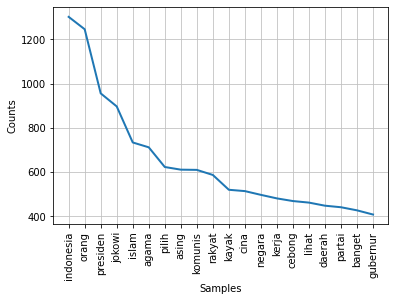

In [ ]:
fdict.plot(20)
plt.show()

In [ ]:
spell_df

,text_lemma,HS,text_filtering
0,iya anjir sudah bolot budek lagi,1,"[iya, anjir, bolot, budek]"
1,sok kenal kamu lunyuk,1,"[sok, kenal, lunyuk]"
2,hyunjin sinting memang ganteng benar,0,"[hyunjin, sinting, ganteng]"
3,usir saja duta besar myanmar kumpul orang budd...,1,"[usir, duta, myanmar, kumpul, orang, buddha, i..."
4,yang tidak pakai jilbab komunis megawati sri m...,1,"[pakai, jilbab, komunis, megawati, sri, mulyan..."
...,...,...,...
11847,astagfirullah aku baca kembang kontrol,0,"[astagfirullah, baca, kembang, kontrol]"
11848,atas nya longa pongo ya bawah nya pada dungu r...,1,"[longa, pongo, dungu, rezim, pikir]"
11849,dasar cebong ih,0,"[dasar, cebong, ih]"
11850,sudah azan subuh nih salat yuk yang kristen sa...,0,"[azan, subuh, nih, salat, yuk, kristen, sate, ..."


In [ ]:
#change list to kalimat
def listToString(text): 
  return ' '.join(map(str, text))

spell_df['str_filtered'] = spell_df['text_filtering'].apply(listToString)

In [ ]:
df_hs_1 = spell_df[spell_df['HS']==1].copy()
df_hs_0 = spell_df[spell_df['HS']==0].copy()

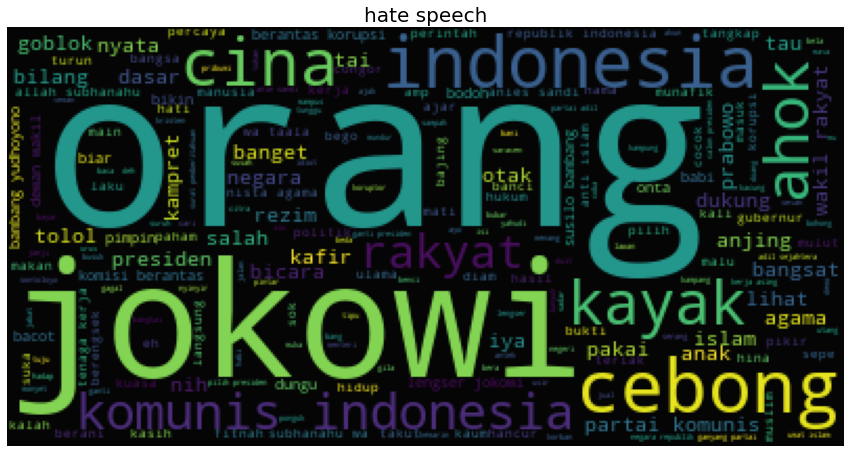

In [ ]:
%matplotlib inline
# wordcloud
wc = WordCloud(background_color='black', max_words=200)
wc.generate(' '.join(df_hs_1['str_filtered']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("hate speech", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

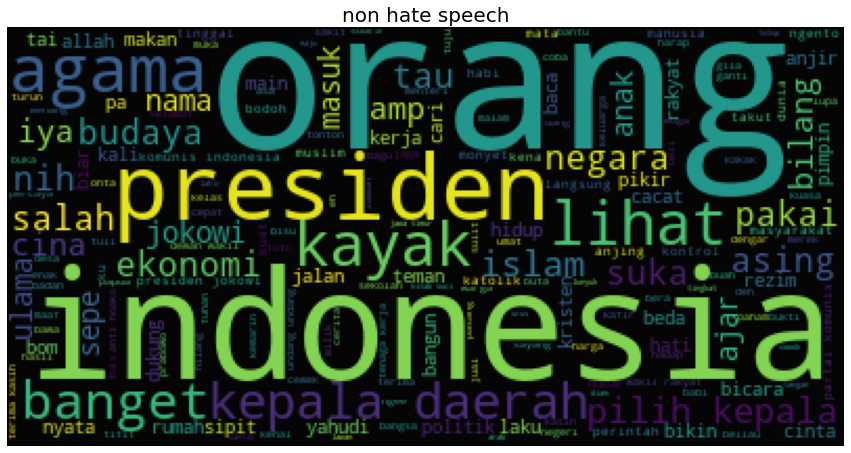

In [ ]:
%matplotlib inline
wc = WordCloud(background_color='black', max_words=200)
wc.generate(' '.join(df_hs_0['str_filtered']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("non hate speech", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

In [ ]:
# create df clean data and label
df_pre = spell_df[['str_filtered','HS']].copy()

In [ ]:
df_pre.shape

(11852, 2)

In [ ]:
df_pre.head()

,str_filtered,HS
0,iya anjir bolot budek,1
1,sok kenal lunyuk,1
2,hyunjin sinting ganteng,0
3,usir duta myanmar kumpul orang buddha indonesi...,1
4,pakai jilbab komunis megawati sri mulyani puan...,1


In [ ]:
df_pre.to_csv('data_cleaned_new.csv')

NameError: ignored

In [ ]:
df= pd.read_csv('data_cleaned_new.csv')
df.head()

,Unnamed: 0,str_filtered,HS
0,0,iya anjir bolot budek,1
1,1,sok kenal lunyuk,1
2,2,hyunjin sinting ganteng,0
3,3,usir duta myanmar kumpul orang buddha indonesi...,1
4,4,pakai jilbab komunis megawati sri mulyani puan...,1


In [ ]:
# create train and val data
X_train, X_val, y_train, y_val = train_test_split(df_pre['str_filtered'], df_pre['HS'], test_size = 0.1)

def marge_df(X_train, y_train):
  X_train = pd.DataFrame(X_train).reset_index()
  y_train = pd.DataFrame(y_train).reset_index()
  df_train = pd.merge(X_train, y_train, on='index', how='right')
  return df_train

In [ ]:
train_df = marge_df(X_train, y_train)
val_df = marge_df(X_val, y_val)

In [ ]:
train_df.shape

(10666, 3)

### fasttext

In [ ]:
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz')) # fasttext file

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
    values = line.split()
    word = values [0].decode('utf-8')
    vector = np.asarray(values[1:], dtype='float32')
    vocab_and_vectors[word] = vector

In [ ]:
type(vocab_and_vectors)

dict

In [ ]:
# how many features should the tokenizer extract
features = 11000
tokenizer_fast = Tokenizer(num_words = features)
# fit the tokenizer on our text
tokenizer_fast.fit_on_texts(df_pre["str_filtered"].tolist())

# get all words that the tokenizer knows
word_index = tokenizer_fast.word_index
print(len(word_index))

# put the tokens in a matrix
X = tokenizer_fast.texts_to_sequences(df_pre["str_filtered"].tolist()) #list
X = pad_sequences(X) # list to matrix

# prepare the labels
y = df_pre["HS"].values

12953


In [ ]:
import pickle

with open('tokenizer_fast.pkl', 'wb') as handle:
    pickle.dump(tokenizer_fast, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
X.shape

(11852, 49)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y.shape

(11852,)

In [ ]:
# split in train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=30)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(10666, 49) (10666,)
(1186, 49) (1186,)


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300)) # create matrix 13015 x 300
for word, i in word_index.items():
    embedding_vector = vocab_and_vectors.get(word)
    # words that cannot be found will be set to 0
    if embedding_vector is not None:
      #print(word)
      embedding_matrix[i] = embedding_vector
       

In [ ]:
embedding_vector

In [ ]:
embedding_matrix.shape

(12954, 300)

### Word2vac

In [ ]:
# Load Pretrained Word2Vec
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
embed

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd76b2d5f10>

In [ ]:
# get max token
def get_max_length(df):

    max_length = 0
    for row in df['str_filtered']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length


In [ ]:
max_length = get_max_length(df_pre)
max_length

49

In [ ]:
# Word2vec for word
def get_word2vec_enc(reviews):
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews

In [ ]:
vec= get_word2vec_enc(df_pre['str_filtered'])

In [ ]:
#change label to list
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [1,0]
    else:
        return [0,1]

In [ ]:
def get_padded_encoded_reviews(encoded_reviews):
 
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        #print(zero_padding_cnt)
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
          #print(i)
          enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

In [ ]:
vec = get_padded_encoded_reviews(vec)
vec[0].shape

(49, 250)

In [ ]:
def preprocess(df):
 
    # encode words into word2vec
    reviews = df['str_filtered'].tolist()
    
    encoded_reviews = get_word2vec_enc(reviews)
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)
    # encoded sentiment
    sentiments = df['HS'].tolist()
    #encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    Y = np.array(sentiments)
    return X, Y

In [ ]:
train_x, train_y = preprocess(train_df)
val_x, val_y = preprocess(val_df)

In [ ]:
train_x.shape

(10666, 49, 250)

# Model

### Pipeline

In [ ]:
#word2vec
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
val_data = tf.data.Dataset.from_tensor_slices((val_x, val_y))

train_data = train_data.batch(124, drop_remainder=True)
val_data = val_data.batch(32, drop_remainder = True)

In [ ]:
#fastext

train_data_fastext = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_data_fastext = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_data_fast = train_data_fastext.batch(124, drop_remainder=True)
val_data_fast = val_data_fastext.batch(32, drop_remainder = True)

## Base Model

In [ ]:
# fasttext
def get_model_fast_base():
  model_base_fast = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim = len(word_index)+1,
                                output_dim = 300,
                                input_length=X.shape[1],
                                weights=[embedding_matrix],
                                embeddings_initializer = 'uniform',
                                trainable=True),

      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])
  model_base_fast.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_base_fast

In [ ]:
model_fast = get_model_fast_base()
hitory = model_fast.fit(train_data_fast,epochs=30, validation_data = val_data_fast)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



86/86 [==============================] - 13s 25ms/step - loss: 0.5245 - accuracy: 0.7283 - val_loss: 0.4118 - val_accuracy: 0.8066
Epoch 2/30
86/86 [==============================] - 1s 13ms/step - loss: 0.3120 - accuracy: 0.8672 - val_loss: 0.4254 - val_accuracy: 0.8209
Epoch 3/30
86/86 [==============================] - 1s 13ms/step - loss: 0.2310 - accuracy: 0.9055 - val_loss: 0.4858 - val_accuracy: 0.8235
Epoch 4/30
86/86 [==============================] - 1s 12ms/step - loss: 0.1759 - accuracy: 0.9302 - val_loss: 0.5661 - val_accuracy: 0.8167
Epoch 5/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1473 - accuracy: 0.9425 - val_loss: 0.6088 - val_accuracy: 0.8066
Epoch 6/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1251 - accuracy: 0.9521 - val_loss: 0.6715 - val_accuracy: 0.7914
Epoch 7/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1026 - accuracy: 0.9585 - val_loss: 0.7203 - val_accuracy: 0.7897
Epoch 8/30
86/86 [=====

In [ ]:
model_fast.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 300)           3891600   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 4,078,609
Trainable params: 4,078,609
Non-trainable params: 0
_________________________________________________________________


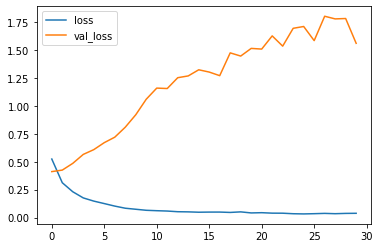

In [ ]:
#loss
metrics = pd.DataFrame(hitory.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
model_f_base = model_fast.predict(X_train)

In [ ]:
model_f_base[model_f_base <= 0.5] = 0
model_f_base[model_f_base > 0.5] = 1

In [ ]:
model_f_base = model_f_base.squeeze()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model_f_base))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6156
           1       0.99      0.98      0.99      4510

    accuracy                           0.99     10666
   macro avg       0.99      0.99      0.99     10666
weighted avg       0.99      0.99      0.99     10666



In [ ]:
#word2vec
def get_model():
  model_base = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),                              
  ])

  model_base.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_base
    

In [ ]:
model = get_model()
hitory_word2vec = model.fit(train_data,epochs=20, validation_data = val_data)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



86/86 [==============================] - 11s 70ms/step - loss: 0.6724 - accuracy: 0.5812 - val_loss: 0.6676 - val_accuracy: 0.5802


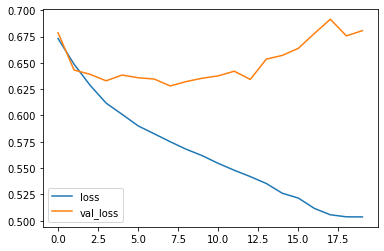

In [ ]:
#loss
metrics = pd.DataFrame(hitory_word2vec.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
predict_w2v_base = model.predict(train_x)

In [ ]:
predict_w2v_base

In [ ]:
predict_w2v_base[predict_w2v_base <= 0.5] = 0
predict_w2v_base[predict_w2v_base > 0.5] = 1

In [ ]:
print(classification_report(train_y, predict_w2v_base))

## model inprovement

In [ ]:
# fasttext
def get_model_fast1():
  model_fast1 = tf.keras.Sequential([
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),

      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dropout(.2),

      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])

  model_fast1.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast1

In [ ]:
import os

In [ ]:
model_fast1 = get_model_fast1()

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


hitory_fast1 = model_fast1.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 28s 237ms/step - loss: 0.6129 - accuracy: 0.6644 - val_loss: 0.5483 - val_accuracy: 0.7162
Epoch 2/20
86/86 [==============================] - 17s 201ms/step - loss: 0.5117 - accuracy: 0.7513 - val_loss: 0.5166 - val_accuracy: 0.7331
Epoch 3/20
86/86 [==============================] - 17s 200ms/step - loss: 0.4882 - accuracy: 0.7650 - val_loss: 0.5100 - val_accuracy: 0.7534
Epoch 4/20
86/86 [==============================] - 17s 198ms/step - loss: 0.4659 - accuracy: 0.7801 - val_loss: 0.5013 - val_accuracy: 0.7517
Epoch 5/20
86/86 [==============================] - 19s 221ms/step - loss: 0.4459 - accuracy: 0.7929 - val_loss: 0.4919 - val_accuracy: 0.7753
Epoch 6/20
86/86 [==============================] - 17s 201ms/step - loss: 0.4301 - accuracy: 0.8022 - val_loss: 0.4983 - val_accuracy: 0.7660
Epoch 7/20
86/86 [==============================] - 17s 201ms/step - loss: 0.4191 - accuracy: 0.8109 - val_loss: 0.4946 - val_accuracy: 0.7686
Epoch 8/20

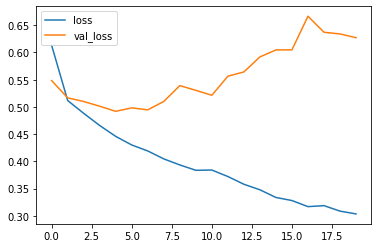

In [ ]:
#loss
metrics = pd.DataFrame(hitory_fast1.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
predit_fast1 = model_fast1.predict(X_train)

In [ ]:
predit_fast1[predit_fast1 <= 0.5] = 0
predit_fast1[predit_fast1 > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predict_fast1 = predit_fast1.squeeze()
print(classification_report(y_train, predict_fast1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6170
           1       0.90      0.77      0.83      4496

    accuracy                           0.87     10666
   macro avg       0.88      0.86      0.86     10666
weighted avg       0.87      0.87      0.87     10666



In [ ]:
# fasttext
def get_model_fast2():
  model_fast2 = tf.keras.Sequential([
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),

      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      #tf.keras.layers.Dropout(.2),

      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])

  model_fast2.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast2

In [ ]:
model_fast2 = get_model_fast2()
hitory_fast2 = model_fast2.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



86/86 [==============================] - 4s 18ms/step - loss: 0.6137 - accuracy: 0.6497 - val_loss: 0.5252 - val_accuracy: 0.7356
Epoch 2/20
86/86 [==============================] - 1s 9ms/step - loss: 0.5089 - accuracy: 0.7469 - val_loss: 0.4943 - val_accuracy: 0.7449
Epoch 3/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4799 - accuracy: 0.7707 - val_loss: 0.4786 - val_accuracy: 0.7627
Epoch 4/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4622 - accuracy: 0.7838 - val_loss: 0.4684 - val_accuracy: 0.7677
Epoch 5/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4494 - accuracy: 0.7946 - val_loss: 0.4631 - val_accuracy: 0.7745
Epoch 6/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4386 - accuracy: 0.8014 - val_loss: 0.4614 - val_accuracy: 0.7787
Epoch 7/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4284 - accuracy: 0.8066 - val_loss: 0.4574 - val_accuracy: 0.7779
Epoch 8/20
86/86 [============

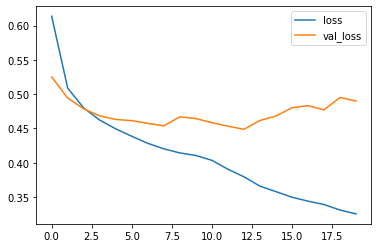

In [ ]:
#loss
metrics = pd.DataFrame(hitory_fast2.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
predit_fast2 = model_fast2.predict(X_train)

predit_fast2[predit_fast2 <= 0.5] = 0
predit_fast2[predit_fast2 > 0.5] = 1

predict_fast2 = predit_fast2.squeeze()
print(classification_report(y_train, predict_fast2))

In [ ]:
# fasttext
def get_model_fast3():
  model_fast3 = tf.keras.Sequential([
                                     
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),
      tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])
  model_fast3.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast3

In [ ]:
model_fast3 = get_model_fast3()
hitory_fast3 = model_fast3.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

In [ ]:
predit_fast3 = model_fast3.predict(X_train)

predit_fast3[predit_fast3 <= 0.5] = 0
predit_fast3[predit_fast3 > 0.5] = 1

predict_fast3 = predit_fast3.squeeze()
print(classification_report(y_train, predict_fast3))

## Model Inference

In [ ]:
df_test1 = df_test.copy()

In [ ]:
df_test1.head(2)

,index,Tweet,HS
0,6091,USER Nanti kita kembalikan lagi marwah kampus ...,1
1,4913,"Indonesia saat ini sedang darurat teroris, ber...",0


In [ ]:
df_test1.drop('index',axis=1, inplace=True)

In [ ]:
df_test1['text'] = df_test1['Tweet'].apply(preprocess_filter)
df_test1[['text']].head(2)

,text
0,nanti kita kembalikan lagi marwah kampus setel...
1,indonesia saat ini sedang darurat teroris berb...


In [ ]:
df_test1['text_lemma'] = df_test1['text'].apply(lemma)

In [ ]:
df_test1.shape

(1317, 4)

In [ ]:
df_test1.head()

,Tweet,HS,text,text_lemma
0,USER Nanti kita kembalikan lagi marwah kampus ...,1,nanti kita kembalikan lagi marwah kampus setel...,nanti kita kembali lagi marwah kampus telah re...
1,"Indonesia saat ini sedang darurat teroris, ber...",0,indonesia saat ini sedang darurat teroris berb...,indonesia saat ini sedang darurat teroris baga...
2,"Aku suka payudaramu.\n""DASAR KURANG AJAR KAU!""...",1,aku suka payudaramu dasar kurang ajar kamu kat...,aku suka payudara dasar kurang ajar kamu kata ...
3,ada perek yang mau dimainin memeknya? Yang lon...,0,ada perek yang mau dimainkan memeknya yang lon...,ada perek yang mau main memek yang long reply ya
4,"baiklah, anak putri langit yang bisu karena la...",0,baiklah anak putri langit yang bisu karena lan...,baik anak putri langit yang bisu karena langit...


In [ ]:
review = []
for index, row in df_test1.iterrows():
    suggestions = sym_spell.lookup_compound(row["text_lemma"], max_edit_distance=2)
    review.append(suggestions[0].term)
    
df_test1["text_lemma"] = review
df_test1.shape

(1317, 4)

In [ ]:
df_test1['text_filtering'] = df_test1['text_lemma'].apply(nltk_stemmer_indo)
df_test1['text_filtering'] = df_test1['text_filtering'].apply(nltk_stemmer_eng)

In [ ]:
df_test1['str_filtered'] = df_test1['text_filtering'].apply(listToString)

In [ ]:
df_test1.head()

,Tweet,HS,text,text_lemma,text_filtering,str_filtered
0,USER Nanti kita kembalikan lagi marwah kampus ...,1,nanti kita kembalikan lagi marwah kampus setel...,nanti kita kembali lagi marwah kampus telah re...,"[marwah, kampus, rejim, biadab, nyung, sep, amin]",marwah kampus rejim biadab nyung sep amin
1,"Indonesia saat ini sedang darurat teroris, ber...",0,indonesia saat ini sedang darurat teroris berb...,indonesia saat ini sedang darurat teroris baga...,"[indonesia, darurat, teroris, rennet, terorism...",indonesia darurat teroris rennet terorisme kot...
2,"Aku suka payudaramu.\n""DASAR KURANG AJAR KAU!""...",1,aku suka payudaramu dasar kurang ajar kamu kat...,aku suka payudara dasar kurang ajar kamu kata ...,"[suka, payudara, dasar, ajar, tampar, pamer, p...",suka payudara dasar ajar tampar pamer puji ber...
3,ada perek yang mau dimainin memeknya? Yang lon...,0,ada perek yang mau dimainkan memeknya yang lon...,ada perek yang mau main merek yang long reply ya,"[perek, main, merek, long, reply]",perek main merek long reply
4,"baiklah, anak putri langit yang bisu karena la...",0,baiklah anak putri langit yang bisu karena lan...,baik anak putri langit yang bisu karena langit...,"[anak, putri, langit, bisu, langit, biru, mili...",anak putri langit bisu langit biru milik robot...


In [ ]:
df_test_pre = df_test1[['str_filtered','HS']].copy()

In [ ]:
df_test_pre.head()

,str_filtered,HS
0,marwah kampus rejim biadab nyung sep amin,1
1,indonesia darurat teroris rennet terorisme kot...,0
2,suka payudara dasar ajar tampar pamer puji ber...,1
3,perek main merek long reply,0
4,anak putri langit bisu langit biru milik robot...,0


In [ ]:
df_test_pre.shape

(1317, 2)

In [ ]:
X_test = tokenizer_fast.texts_to_sequences(df_test_pre["str_filtered"].tolist())
X_test = pad_sequences(X_test, maxlen= X.shape[1])

In [ ]:
X_test = pad_sequences(X_test, maxlen= X.shape[1])

In [ ]:
X_test

array([[   0,    0,    0, ..., 1611, 1317,  372],
       [   0,    0,    0, ...,  615, 1452,  219],
       [   0,    0,    0, ...,  888,  900,  225],
       ...,
       [   0,    0,    0, ...,  178,  334, 1287],
       [   0,    0,    0, ...,   13,  607,   30],
       [   0,    0,    0, ...,    3,  228,  286]], dtype=int32)

In [ ]:
X_test.shape

(1317, 49)

In [ ]:
y_test = df_test["HS"].values

In [ ]:
pred_test = model_fast1.predict(X_test)

In [ ]:
pred_test[pred_test <= 0.5] = 0
pred_test[pred_test > 0.5] = 1

pred_test = pred_test.squeeze()

In [ ]:
pred_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       752
           1       0.79      0.64      0.71       565

    accuracy                           0.77      1317
   macro avg       0.78      0.76      0.76      1317
weighted avg       0.77      0.77      0.77      1317



In [ ]:
#simple test

test = pd.Series('kamu sangat bodoh')

In [ ]:
a = tokenizer_fast.texts_to_sequences(test)
a = pad_sequences(a, maxlen= X.shape[1])

In [ ]:
predtest = model_fast1.predict(X_test)

In [ ]:
predtest[pred_test <= 0.5] = 0
predtest[pred_test > 0.5] = 1

predtest = pred_test.squeeze()

In [ ]:
len(predtest)

1317

In [ ]:
f = 'kaos parti pdi'
lemma(f)

In [ ]:
stemmer_i = nltk_stemmer_indo(f)
stemmer_i

In [ ]:
X_ = tokenizer_fast.texts_to_matrix(f)
X_

In [ ]:
X_.shape

In [ ]:
X_ = tokenizer_fast.texts_to_sequences(X_)



EDA analisysis : 
1. pada label hate speech memiliki label yang balance dengan HS 42.2% dan no_HS 57.8%
2. pada label jenis heate speech yang paling tinggi yaitu Abusive dengan nilai 27.5%
3. quantity jumlah kata pada setiap kalimat paling banyak pada junlah kata 9 dengan quantity 530
4. kata paling banyak sebeklun dilakukan lemma, spell dan stemmimng yaitu kaya yang dengan nilai sekisar 4500
5. kata paling banyak setelah dilakukan prepros yaitu kata indonesia dengan nilai sekisar 1200

Model analis :
1. model terbaik antara model base dengan menggunakan word2vec dengan model base dengan fasttext yaitu model base dengan fasttext dengan recall score, sehingga saya menggnakan fasttext
2. model terbaik yaitu model base dengan fasttext 
